# Table of Contents
## 1. Import Libraries and Data
## 2. Clean Data
## 3. Prep Data for Regression Analysis
## 4. Regression Analysis

# 1. Import Libraries and Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Display graphs w/o calling
%matplotlib inline

In [3]:
#Import data
path = r"C:\Users\carol\Documents\Career Foundry\6 Advanced Analytics & Dashboard Design\A6 Project"
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'citibike.csv'), index_col = False)

# 2. Clean Data

## Review Data

In [4]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,Pn4kpQ,16699,Sun,16,9/22/2013 16:10,72,W 52 St & 11 Ave,40.767272,-73.993929,9/22/2013 16:33,290,2 Ave & E 58 St,40.760203,-73.964785,1376,Subscriber,1986.0,2
1,FHenrJ,16837,Fri,17,9/20/2013 17:44,72,W 52 St & 11 Ave,40.767272,-73.993929,9/20/2013 17:49,385,E 55 St & 2 Ave,40.757973,-73.966033,303,Subscriber,1980.0,1
2,NAIdSB,14778,Sat,15,9/14/2013 15:52,72,W 52 St & 11 Ave,40.767272,-73.993929,9/14/2013 15:56,305,E 58 St & 3 Ave,40.760958,-73.967245,232,Subscriber,1971.0,1
3,P7EP9i,19985,Thu,19,9/19/2013 19:25,72,W 52 St & 11 Ave,40.767272,-73.993929,9/19/2013 19:38,464,E 56 St & 3 Ave,40.759345,-73.967597,795,Subscriber,1984.0,1
4,U0UCWc,19765,Mon,21,9/16/2013 21:54,72,W 52 St & 11 Ave,40.767272,-73.993929,9/16/2013 22:09,367,E 53 St & Lexington Ave,40.758281,-73.970694,891,Subscriber,1980.0,1


In [13]:
df.shape

(50000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  50000 non-null  object 
 1   bike_id                  50000 non-null  int64  
 2   weekday                  50000 non-null  object 
 3   start_hour               50000 non-null  int64  
 4   start_time               50000 non-null  object 
 5   start_station_id         50000 non-null  int64  
 6   start_station_name       50000 non-null  object 
 7   start_station_latitude   50000 non-null  float64
 8   start_station_longitude  50000 non-null  float64
 9   end_time                 50000 non-null  object 
 10  end_station_id           50000 non-null  int64  
 11  end_station_name         50000 non-null  object 
 12  end_station_latitude     50000 non-null  float64
 13  end_station_longitude    50000 non-null  float64
 14  trip_duration         

Missing values in birth_year column correspond to non-subscribers.

## Convert Weekdays to Numbers

In [7]:
df['weekday'].value_counts(dropna = False)

Mon    7715
Sun    7319
Fri    7309
Wed    7228
Tue    7065
Thu    6857
Sat    6507
Name: weekday, dtype: int64

In [9]:
#Create list of number values for days of week
day = []

for value in df['weekday']:
    if value == 'Sun':
        x = 0
        day.append(x)
    if value == 'Mon':
        x = 1
        day.append(x)
    if value == 'Tue':
        x = 2
        day.append(x)
    if value == 'Wed':
        x = 3
        day.append(x)
    if value == 'Thu':
        x = 4
        day.append(x)
    if value == 'Fri':
        x = 5
        day.append(x)
    if value == 'Sat':
        x = 6
        day.append(x)

In [10]:
#Check results
day

[0,
 5,
 6,
 4,
 1,
 1,
 5,
 4,
 3,
 0,
 2,
 4,
 5,
 1,
 5,
 3,
 6,
 0,
 3,
 0,
 1,
 5,
 4,
 5,
 2,
 3,
 1,
 5,
 5,
 2,
 0,
 2,
 6,
 4,
 4,
 5,
 2,
 2,
 5,
 5,
 6,
 0,
 5,
 5,
 0,
 1,
 2,
 5,
 6,
 3,
 2,
 5,
 0,
 1,
 6,
 4,
 0,
 4,
 1,
 3,
 0,
 0,
 4,
 3,
 1,
 5,
 0,
 6,
 2,
 5,
 0,
 6,
 4,
 5,
 0,
 6,
 0,
 4,
 1,
 1,
 6,
 1,
 0,
 6,
 3,
 2,
 6,
 4,
 2,
 6,
 6,
 0,
 3,
 1,
 5,
 4,
 1,
 5,
 1,
 3,
 5,
 0,
 4,
 5,
 5,
 0,
 5,
 6,
 6,
 5,
 4,
 0,
 5,
 6,
 0,
 5,
 5,
 1,
 3,
 2,
 4,
 4,
 2,
 6,
 6,
 4,
 4,
 3,
 5,
 3,
 1,
 6,
 1,
 2,
 0,
 3,
 5,
 2,
 6,
 6,
 6,
 1,
 3,
 1,
 2,
 4,
 1,
 5,
 3,
 5,
 3,
 0,
 0,
 1,
 3,
 3,
 1,
 4,
 6,
 0,
 0,
 2,
 3,
 1,
 6,
 0,
 2,
 5,
 3,
 3,
 5,
 3,
 1,
 4,
 1,
 4,
 1,
 0,
 1,
 4,
 1,
 4,
 4,
 3,
 5,
 5,
 3,
 6,
 4,
 3,
 5,
 5,
 5,
 3,
 3,
 2,
 2,
 3,
 5,
 6,
 2,
 2,
 5,
 4,
 0,
 5,
 6,
 0,
 3,
 4,
 5,
 4,
 4,
 6,
 3,
 2,
 0,
 1,
 2,
 0,
 3,
 4,
 4,
 4,
 6,
 4,
 3,
 6,
 5,
 6,
 1,
 6,
 2,
 4,
 4,
 5,
 2,
 2,
 2,
 3,
 5,
 5,
 6,
 0,
 6,
 2,
 1,
 2,
 4,
 4,


In [11]:
#Add day list to dataframe
df['day'] = day

In [12]:
#Check results
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,day
0,Pn4kpQ,16699,Sun,16,9/22/2013 16:10,72,W 52 St & 11 Ave,40.767272,-73.993929,9/22/2013 16:33,290,2 Ave & E 58 St,40.760203,-73.964785,1376,Subscriber,1986.0,2,0
1,FHenrJ,16837,Fri,17,9/20/2013 17:44,72,W 52 St & 11 Ave,40.767272,-73.993929,9/20/2013 17:49,385,E 55 St & 2 Ave,40.757973,-73.966033,303,Subscriber,1980.0,1,5
2,NAIdSB,14778,Sat,15,9/14/2013 15:52,72,W 52 St & 11 Ave,40.767272,-73.993929,9/14/2013 15:56,305,E 58 St & 3 Ave,40.760958,-73.967245,232,Subscriber,1971.0,1,6
3,P7EP9i,19985,Thu,19,9/19/2013 19:25,72,W 52 St & 11 Ave,40.767272,-73.993929,9/19/2013 19:38,464,E 56 St & 3 Ave,40.759345,-73.967597,795,Subscriber,1984.0,1,4
4,U0UCWc,19765,Mon,21,9/16/2013 21:54,72,W 52 St & 11 Ave,40.767272,-73.993929,9/16/2013 22:09,367,E 53 St & Lexington Ave,40.758281,-73.970694,891,Subscriber,1980.0,1,1


## Remove Unnecessary Columns

In [14]:
df.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'day'],
      dtype='object')

In [15]:
#Create subset w/o unnecessary columns
df_reg = df.drop(['trip_id', 'bike_id', 'weekday', 'start_time', 'start_station_id', 'start_station_name', 
                  'start_station_latitude', 'start_station_longitude', 'end_time', 'end_station_id', 'end_station_name', 
                  'end_station_latitude', 'end_station_longitude'], axis=1)

In [16]:
#Check results
df_reg.head()

,start_hour,trip_duration,subscriber,birth_year,gender,day
0,16,1376,Subscriber,1986.0,2,0
1,17,303,Subscriber,1980.0,1,5
2,15,232,Subscriber,1971.0,1,6
3,19,795,Subscriber,1984.0,1,4
4,21,891,Subscriber,1980.0,1,1


For this regression I'd like to look at all customer data together rather than split into subscriber and non-subscriber. Since only subscribers' data includes birth_year and gender, I'm going to remove those columns as well.

In [18]:
#Drop unnecessary columns
df_reg = df_reg.drop(['subscriber', 'birth_year', 'gender'], axis=1)

In [19]:
#Check results
df_reg.head()

,start_hour,trip_duration,day
0,16,1376,0
1,17,303,5
2,15,232,6
3,19,795,4
4,21,891,1


## Clean Data

In [21]:
#Check for missing values
df_reg.isnull().sum()

start_hour       0
trip_duration    0
day              0
dtype: int64

In [22]:
#Check for duplicates
dups = df_reg.duplicated()
dups.shape

(50000,)

In [23]:
#Check for mixed types
for col in df_reg.columns.tolist():
  weird = (df_reg[[col]].applymap(type) != df_reg[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_reg[weird]) > 0:
    print (col)

No missing values, duplicates, or mixed type columns.

# 3. Prep Data for Regression Analysis

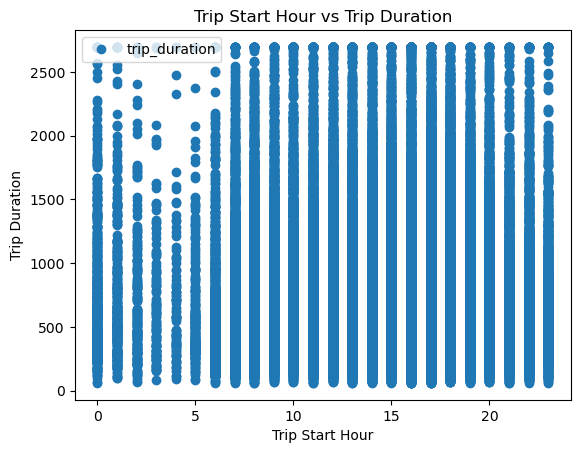

In [24]:
#Scatter plot
df_reg.plot(x = 'start_hour', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Trip Start Hour vs Trip Duration')  
plt.xlabel('Trip Start Hour')  
plt.ylabel('Trip Duration')  
plt.show()

Hypothesis: Longer duration trips occur late in the day

In [25]:
# Reshape variables into NumPy arrays
X = df_reg['start_hour'].values.reshape(-1,1)
y = df_reg['trip_duration'].values.reshape(-1,1)

In [26]:
#Check results
X

array([[16],
       [17],
       [15],
       ...,
       [21],
       [22],
       [19]], dtype=int64)

In [27]:
y

array([[1376],
       [ 303],
       [ 232],
       ...,
       [ 131],
       [2115],
       [ 209]], dtype=int64)

In [28]:
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression Analysis

In [29]:
# Create regression object
regression = LinearRegression()

In [30]:
#Fit regression object to training set
regression.fit(X_train, y_train)

LinearRegression()

In [31]:
#Predict y values
y_predicted = regression.predict(X_test)

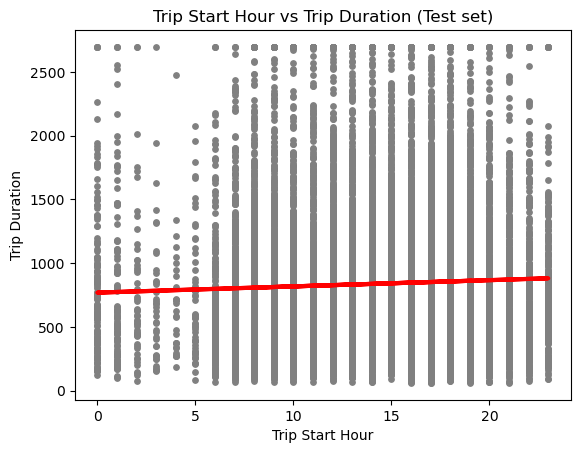

In [32]:
#Plot regression line on test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Trip Start Hour vs Trip Duration (Test set)')
plot_test.xlabel('Trip Start Hour')
plot_test.ylabel('Trip Duration')
plot_test.show()

Based on this visualization, there is a very slight positive correlation between trip start hour and duration but it's extremely small.

In [33]:
#Summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [34]:
# Print model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.88969791]]
Mean squared error:  329765.99562333873
R2 score:  0.0015103302496696225


In [35]:
#Compare actual and predicted y values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,445,807.804276
1,1315,837.142463
2,452,846.921859
3,1736,856.701255
4,629,861.590953
5,190,807.804276
6,1121,846.921859
7,549,837.142463
8,1742,832.252765
9,1108,812.693974


Based on the results of this regression and the summary statistics, linear regression is not the best fit for this data. Because it was difficult to visually discern individual points in the original scatterplot I thought there was potential for a greater correlation between trip start time and duration. For example, there are obviously fewer and shorter trips in the middle of the night, and I thought perhaps there would be more late afternoon/evening usage for people going to events, out to eat, etc. 